In [1]:
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd

c_blue1 = '#5c509d'
c_green1 = '#7dc0a7'
# c_green2 = '#39d05c'
c_green3 = '#519e5c'
c_green4 = '#396f42'
c_green5 = '#417f4a'
c_violet1 = '#301466'
c_violet2 = '#b295f6'
c_gray1 = '#444444'
c_gray2 = '#888888'
c_orange1 = '#ECA72C'
c_red1 = '#ed2d2d'
c_red2 = '#810b0b'
c_red3 = '#b51010'
c_red4 = '#bb2525'
c_blue2 = '#4039da'
c_blue3 = '#1a1574'
c_blue4 = '#251ea3'
c_blue5 = '#3632ab'
c_pink1 = '#f69595'

llama2_str = 'llama2'
llama3_str = 'llama3'
gpt_str = 'gpt35t'

color_by_model = {llama2_str: c_blue1, llama3_str: c_green1, gpt_str: c_orange1}
marker_by_model = {llama2_str: 'o', llama3_str: 's', gpt_str: '^'}
label_by_model = {llama2_str: 'Llama2', llama3_str: 'Llama3', gpt_str: 'GPT3.5t'}
offset_by_model = {llama2_str: -10, llama3_str: 0, gpt_str: 10}

base_dir = Path('../relevant_runs_copies') / 'main_runs_copies'
rebuttal_dir = base_dir / 'rebuttal_plots'
quests_dirname = '{model_name}_v10_questions'
initial_quests_dir = base_dir / 'llama2_v00_questions'
urndx_dirname = '{model_name}_URNDx_ws10'
ws100_dirname = '{model_name}_AD_ws100'
temperature_dirname = '{model_name}_temperature'
zscot_dir = base_dir / 'zscot'

checkers_names = ["time", "rule", "aggregation"]
custom_order = ['rules', 'time', 'state']
comprehension_questions_labels = ['min_max', 'actions', 'payoff', 'round', 'action$_i$', 'points$_i$', '#actions', '#points']
sfem_strategies_labels = ['AD', 'RND', 'AC', 'TFT', 'STFT', 'GRIM', 'WSLS']



C:\Users\fonta\AppData\Local\Temp\ipykernel_21232\3823127841.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=90, fontsize=18)


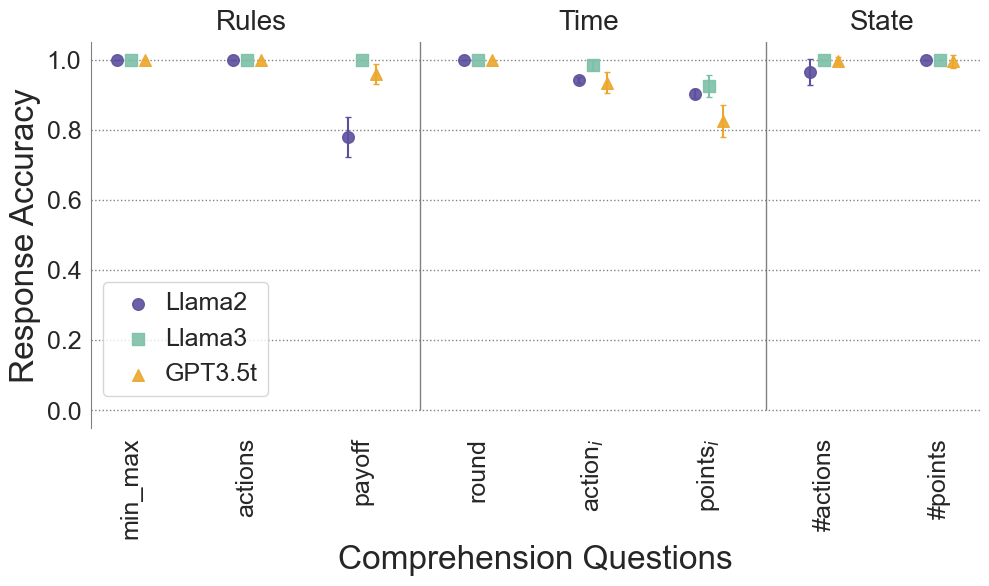

In [20]:
from matplotlib import transforms

# Plot comprehension questions

csv_name = 'comprehension_questions_results.csv'

unordered_llama2_df = pd.read_csv(base_dir / quests_dirname.format(model_name=llama2_str) / csv_name)
unordered_llama2_df['type'] = pd.Categorical(unordered_llama2_df['type'], categories=custom_order, ordered=True)
llama2_df = unordered_llama2_df.sort_values('type').reset_index(drop=True)

unordered_llama3_df = pd.read_csv(base_dir / quests_dirname.format(model_name=llama3_str) / csv_name)
unordered_llama3_df['type'] = pd.Categorical(unordered_llama3_df['type'], categories=custom_order, ordered=True)
llama3_df = unordered_llama3_df.sort_values('type').reset_index(drop=True)

unordered_gpt_df = pd.read_csv(base_dir / quests_dirname.format(model_name=gpt_str) / csv_name)
unordered_gpt_df['type'] = pd.Categorical(unordered_gpt_df['type'], categories=custom_order, ordered=True)
gpt_df = unordered_gpt_df.sort_values('type').reset_index(drop=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax.scatter(llama2_df['label'], llama2_df['accuracy'], marker=marker_by_model[llama2_str],
           s=70, zorder=10, alpha=0.9, c=color_by_model[llama2_str], label=label_by_model[llama2_str], transform=trans+offset(offset_by_model[llama2_str]))
ax.errorbar(llama2_df['label'], llama2_df['accuracy'],
            yerr=llama2_df['ci_ub'] - llama2_df['ci_lb'],
            capsize=2, fmt='none', c=color_by_model[llama2_str], transform=trans+offset(offset_by_model[llama2_str]))

ax.scatter(llama3_df['label'], llama3_df['accuracy'], marker=marker_by_model[llama3_str],
           s=70, zorder=10, alpha=0.9, c=color_by_model[llama3_str], label=label_by_model[llama3_str])
ax.errorbar(llama3_df['label'], llama3_df['accuracy'],
            yerr=llama3_df['ci_ub'] - llama3_df['ci_lb'],
            capsize=2, fmt='none', c=color_by_model[llama3_str])

ax.scatter(gpt_df['label'], gpt_df['accuracy'], marker=marker_by_model[gpt_str],
           s=70, zorder=10, alpha=0.9, c=color_by_model[gpt_str], label=label_by_model[gpt_str], transform=trans+offset(offset_by_model[gpt_str]))
ax.errorbar(gpt_df['label'], gpt_df['accuracy'],
            yerr=gpt_df['ci_ub'] - gpt_df['ci_lb'],
            capsize=2, fmt='none', c=color_by_model[gpt_str], transform=trans+offset(offset_by_model[gpt_str]))

# ax.set_xlabel('Comprehension questions', fontsize=24)
# ax.set_ylabel(f'{model_name} response accuracy', fontsize=24)

x_labels = comprehension_questions_labels
ax.set_ylim(-0.05, 1.05)
ax.tick_params(axis='both', labelsize=18)
ax.set_xticklabels(x_labels, rotation=90, fontsize=18)

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_facecolor('white')

ax.vlines(2.5, 0, 1.1, color='gray', linewidth=1)
ax.vlines(5.5, 0, 1.1, color='gray', linewidth=1)

ax.grid(axis='y', color='gray', linestyle=':', linewidth=1)
ax.text(0.18, 1.05, 'Rules', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.56, 1.05, 'Time', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.89, 1.05, 'State', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

lgnd = plt.legend(fontsize=18, loc="lower left", handletextpad=0.05,
                  ncol=1, bbox_to_anchor=(0.0, 0.05))
lgnd.get_frame().set_facecolor('white')
# lgnd.get_frame().set_linewidth(0.0)

plt.ylabel('Response Accuracy', fontsize=24)
plt.xlabel('Comprehension Questions', fontsize=24)
plt.tight_layout()
out_fig_name = f'comprehension_questions'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

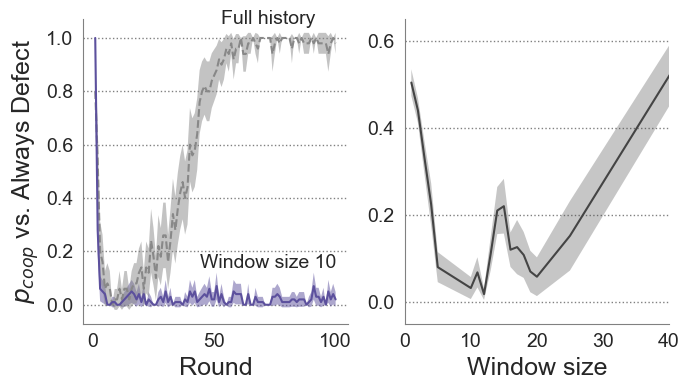

In [53]:
fig, axs = plt.subplots(1,2,figsize=(7,4))
# fig, ax = plt.subplots(1,1,figsize=(5,4))
alpha=1.0

wdw100_df = pd.read_csv(base_dir / ws100_dirname.format(model_name=llama2_str) / "average_cooperation_per_round.csv")
wdw10_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama2_str) / 'URND00' / "average_cooperation_per_round.csv")
wdw_size_df = pd.read_csv(base_dir / ws100_dirname.format(model_name=llama2_str) / "steady_state_cooperation_per_window_sizes.csv")

ax = axs[0]

ax.plot(wdw10_df['iteration'], wdw10_df[f'mean'], '-', markersize=5,
            c=color_by_model[llama2_str], zorder=2, alpha=alpha, label="ws 10")
ax.fill_between(wdw10_df['iteration'], wdw10_df[f'ci_lb'], wdw10_df[f'ci_ub'], 
                color=color_by_model[llama2_str], edgecolor="none", alpha=0.5, zorder=1)

ax.plot(wdw100_df['iteration'], wdw100_df[f'mean'], '--', markersize=5,
            c=c_gray2, zorder=1, alpha=alpha, label="no wdw")
ax.fill_between(wdw100_df['iteration'], wdw100_df[f'ci_lb'], wdw100_df[f'ci_ub'], 
                color=c_gray2, edgecolor="none", alpha=0.5, zorder=1)

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
#ax.set_xticks(df_win['iteration'])
ax.set_ylabel('$p_{coop}$ vs. Always Defect', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Round', fontsize=18)

ax.text(0.7, 1, 'Full history', fontsize=14,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.text(0.7, 0.2, 'Window size 10', fontsize=14,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

ax = axs[1]
ax.plot(wdw_size_df['window_size'], wdw_size_df[f'mean'], '-', markersize=5,
            c=c_gray1, zorder=2, alpha=alpha)
ax.fill_between(wdw_size_df['window_size'], wdw_size_df[f'ci_lb'], wdw_size_df[f'ci_ub'], 
                color=c_gray1, edgecolor="none", alpha=0.3, zorder=1)

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_xlim([0,40])
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Window size', fontsize=18)
ax.set_yticks([0,0.2,0.4,0.6])
ax.set_ylim([-0.05, 0.65])
# plt.legend()
plt.tight_layout()
out_fig_name = f'window_sizes_comparison'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

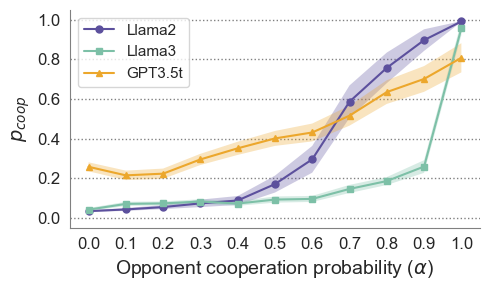

In [70]:
csv_name = 'coop_probability_vs_urnd_alpha.csv'

llama2_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama2_str) / csv_name)
llama3_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama3_str) / csv_name)
gpt_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=gpt_str) / csv_name)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.plot(llama2_df['URND_alpha'], llama2_df['model_coop'], marker=marker_by_model[llama2_str], markersize=5, zorder=2, alpha=1.0, c=color_by_model[llama2_str],
        label=label_by_model[llama2_str])
ax.fill_between(llama2_df['URND_alpha'], llama2_df['ci_lb'], llama2_df['ci_ub'], color=color_by_model[llama2_str], alpha=0.3, edgecolor="none", zorder=1)

ax.plot(llama3_df['URND_alpha'], llama3_df['model_coop'], marker=marker_by_model[llama3_str], markersize=5, zorder=2, alpha=1.0, c=color_by_model[llama3_str],
        label=label_by_model[llama3_str])
ax.fill_between(llama3_df['URND_alpha'], llama3_df['ci_lb'], llama3_df['ci_ub'], color=color_by_model[llama3_str], alpha=0.3, edgecolor="none", zorder=1)

ax.plot(gpt_df['URND_alpha'], gpt_df['model_coop'], marker=marker_by_model[gpt_str], markersize=5, zorder=2, alpha=1.0, c=color_by_model[gpt_str], label=label_by_model[gpt_str])
ax.fill_between(gpt_df['URND_alpha'], gpt_df['ci_lb'], gpt_df['ci_ub'], color=color_by_model[gpt_str], alpha=0.3, edgecolor="none", zorder=1)

ax.set_facecolor('white')

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_xticks([x / 10 for x in range(11)])
# ax.set_ylabel(f'{model_name} $p_{{coop}}$', fontsize=14)
ax.set_ylabel(f'$p_{{coop}}$', fontsize=14)
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([-0.05, 1.05])
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
lgnd = plt.legend(loc='upper left', fontsize=11)
lgnd.get_frame().set_facecolor('white')
plt.tight_layout()

out_fig_name = f'coop_per_alpha'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

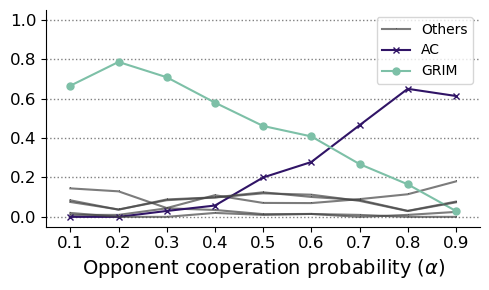

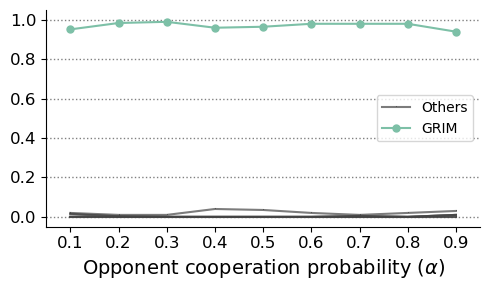

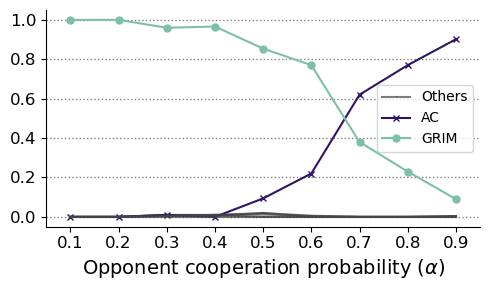

In [16]:
# # Plot SFEM scores
# 
# for model_name in {llama2_str, llama3_str, gpt_str}:
# 
#     df_sfem = pd.read_csv(base_dir / urndx_dirname.format(model_name=model_name) / f"sfem_scores_vs_urnd_alpha.csv")
#     threshold = 0.2
#     best_strategies = []
#     for strategy_label in sfem_strategies_labels:
#         if df_sfem[f'{strategy_label}_score'].max() > threshold:
#             best_strategies.append(strategy_label)
#     best_strategies.sort(key=lambda x: df_sfem[f'{x}_score'].max(), reverse=True)
#     best_strategies = best_strategies[:min(3, len(best_strategies))]
#     colors = [c_green1, c_violet1, c_orange1]
#     markers = ['o', 'x', '^']
#     fig, ax = plt.subplots(1, 1, figsize=(5, 3))
#     others_already_set = False
#     for strategy_label in sfem_strategies_labels:
#         alpha = 1 if strategy_label in best_strategies else 0.7
#         color = colors[best_strategies.index(strategy_label)] if strategy_label in best_strategies else c_gray1
#         marker = markers[best_strategies.index(strategy_label)] if strategy_label in best_strategies else ','
#         label = strategy_label if strategy_label in best_strategies else None
#         if label is None and not others_already_set:
#             label = 'Others'
#             others_already_set = True
#         ax.plot(df_sfem['URND_alpha'], df_sfem[f'{strategy_label}_score'], marker=marker, markersize=5,
#                 c=color, zorder=4, alpha=alpha, label=label)
# 
#     ax.spines[['right', 'top']].set_visible(False)
#     ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
#     ax.set_xticks(df_sfem['URND_alpha'])
#     # ax.set_ylabel(f'{model_name} SFEM score', fontsize=14)
#     ax.set_ylim([-0.05, 1.05])
#     ax.set_xlim([0.05, 0.95])
#     ax.tick_params(axis='both', labelsize=12)
#     ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
#     plt.legend()
#     plt.tight_layout()
# 
#     out_fig_name = f'{model_name}_sfem_per_alpha'
#     file_path = rebuttal_dir / out_fig_name
#     plt.savefig(file_path.with_suffix('.pdf'))
#     plt.savefig(file_path.with_suffix('.png'))

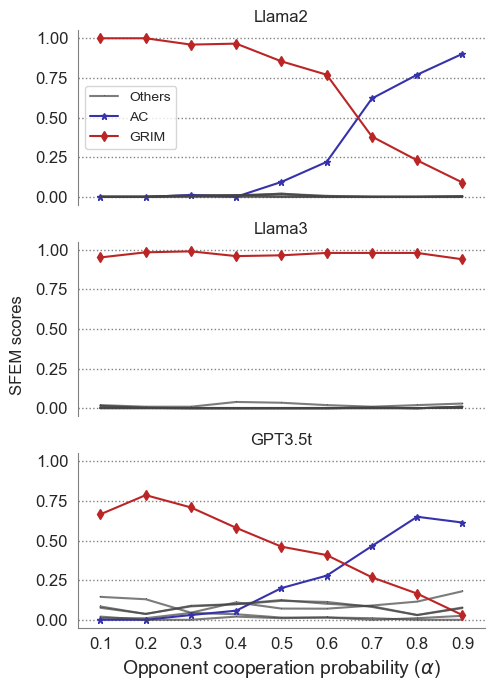

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(5, 7))
fig.supylabel('SFEM scores')
for i, (model_name, ax) in enumerate(zip([llama2_str, llama3_str, gpt_str], axs)):
    df_sfem = pd.read_csv(base_dir / urndx_dirname.format(model_name=model_name) / f"sfem_scores_vs_urnd_alpha.csv")
    threshold = 0.2
    best_strategies = []
    for strategy_label in sfem_strategies_labels:
        if df_sfem[f'{strategy_label}_score'].max() > threshold:
            best_strategies.append(strategy_label)
    best_strategies.sort(key=lambda x: df_sfem[f'{x}_score'].max(), reverse=True)
    best_strategies = best_strategies[:min(3, len(best_strategies))]
    colors = [c_red4, c_blue5, c_violet1]
    markers = ['d', '*', '<']
    others_already_set = False
    for strategy_label in sfem_strategies_labels:
        alpha = 1 if strategy_label in best_strategies else 0.7
        color = colors[best_strategies.index(strategy_label)] if strategy_label in best_strategies else c_gray1
        marker = markers[best_strategies.index(strategy_label)] if strategy_label in best_strategies else ','
        label = strategy_label if strategy_label in best_strategies else None
        if label is None and not others_already_set:
            label = 'Others'
            others_already_set = True
        ax.plot(df_sfem['URND_alpha'], df_sfem[f'{strategy_label}_score'], marker=marker, markersize=5,
                c=color, zorder=4, alpha=alpha, label=label)

    ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
    ax.spines[['right', 'top', 'bottom']].set_visible(False) if i < 2 else ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticks(df_sfem['URND_alpha'])
    ax.set_xticklabels([])
    ax.set_title(label_by_model[model_name])
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=1.0, zorder=0)
    ax.set_facecolor('white')
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlim([0.05, 0.95])
    ax.tick_params(axis='both', labelsize=12)
    # ax.set_ylabel(f'{label_by_model[model_name]}', fontsize=14)
    lgnd = ax.legend() if i == 0 else None
    # lgnd = plt.legend(fontsize=15, loc="lower left", handletextpad=0.05,
    #                   ncol=1)  # bbox_to_anchor=(0.1, 0.1), frameon=False
    lgnd.get_frame().set_facecolor('white') if lgnd is not None else None
    # lgnd.get_frame().set_linewidth(0.0)
ax.set_xticks(df_sfem['URND_alpha'])
ax.set_xticklabels([x / 10 for x in range(1, 10)])
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
plt.tight_layout()

out_fig_name = f'sfem_per_alpha'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

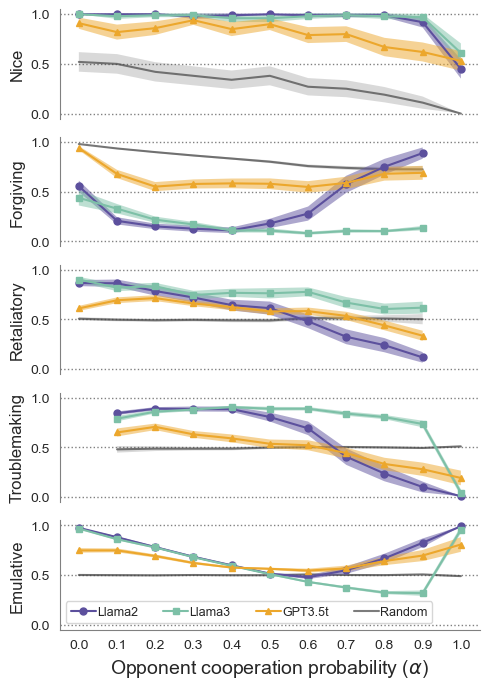

In [23]:
from src.analysis.behavioral_profile import behavioral_dimensions

# Plot behavioral profile

csv_name = 'behavioral_profile_vs_urnd_alpha.csv'

llama2_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama2_str) / csv_name)
llama2_df.at[10, 'forgiving_mean'] = float("NaN")
llama2_df.at[10, 'forgiving_ci_lb'] = float("NaN")
llama2_df.at[10, 'forgiving_ci_ub'] = float("NaN")
llama2_df.at[10, 'retaliatory_mean'] = float("NaN")
llama2_df.at[10, 'retaliatory_ci_lb'] = float("NaN")
llama2_df.at[10, 'retaliatory_ci_ub'] = float("NaN")
llama2_df.at[0, 'troublemaking_mean'] = float("NaN")
llama2_df.at[0, 'troublemaking_ci_lb'] = float("NaN")
llama2_df.at[0, 'troublemaking_ci_ub'] = float("NaN")

llama3_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama3_str) / csv_name)
llama3_df.at[10, 'forgiving_mean'] = float("NaN")
llama3_df.at[10, 'forgiving_ci_lb'] = float("NaN")
llama3_df.at[10, 'forgiving_ci_ub'] = float("NaN")
llama3_df.at[10, 'retaliatory_mean'] = float("NaN")
llama3_df.at[10, 'retaliatory_ci_lb'] = float("NaN")
llama3_df.at[10, 'retaliatory_ci_ub'] = float("NaN")
llama3_df.at[0, 'troublemaking_mean'] = float("NaN")
llama3_df.at[0, 'troublemaking_ci_lb'] = float("NaN")
llama3_df.at[0, 'troublemaking_ci_ub'] = float("NaN")

gpt_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=gpt_str) / csv_name)
gpt_df.at[10, 'forgiving_mean'] = float("NaN")
gpt_df.at[10, 'forgiving_ci_lb'] = float("NaN")
gpt_df.at[10, 'forgiving_ci_ub'] = float("NaN")
gpt_df.at[10, 'retaliatory_mean'] = float("NaN")
gpt_df.at[10, 'retaliatory_ci_lb'] = float("NaN")
gpt_df.at[10, 'retaliatory_ci_ub'] = float("NaN")
gpt_df.at[0, 'troublemaking_mean'] = float("NaN")
gpt_df.at[0, 'troublemaking_ci_lb'] = float("NaN")
gpt_df.at[0, 'troublemaking_ci_ub'] = float("NaN")

df_profile_rnd = pd.read_csv(base_dir / "RND_URNDx" / csv_name)
df_profile_rnd.at[10, 'forgiving_mean'] = float("NaN")
df_profile_rnd.at[10, 'forgiving_ci_lb'] = float("NaN")
df_profile_rnd.at[10, 'forgiving_ci_ub'] = float("NaN")
df_profile_rnd.at[10, 'retaliatory_mean'] = float("NaN")
df_profile_rnd.at[10, 'retaliatory_ci_lb'] = float("NaN")
df_profile_rnd.at[10, 'retaliatory_ci_ub'] = float("NaN")
df_profile_rnd.at[0, 'troublemaking_mean'] = float("NaN")
df_profile_rnd.at[0, 'troublemaking_ci_lb'] = float("NaN")
df_profile_rnd.at[0, 'troublemaking_ci_ub'] = float("NaN")
fig, axs = plt.subplots(5, 1, figsize=(5, 7))
for i, (d, ax) in enumerate(zip(behavioral_dimensions.keys(), axs)):
    #    ax= axs[0]
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)

    ax.plot(llama2_df['URND_alpha'], llama2_df[f'{d}_mean'], marker=marker_by_model[llama2_str], markersize=5, color=color_by_model[llama2_str],
            zorder=4, label=label_by_model[llama2_str])
    ax.fill_between(llama2_df['URND_alpha'], llama2_df[f'{d}_ci_lb'], llama2_df[f'{d}_ci_ub'],
                    color=color_by_model[llama2_str], edgecolor="none", alpha=0.5, zorder=3)

    ax.plot(llama3_df['URND_alpha'], llama3_df[f'{d}_mean'], marker=marker_by_model[llama3_str], markersize=5, color=color_by_model[llama3_str],
            zorder=4, label=label_by_model[llama3_str])
    ax.fill_between(llama3_df['URND_alpha'], llama3_df[f'{d}_ci_lb'], llama3_df[f'{d}_ci_ub'],
                    color=color_by_model[llama3_str], edgecolor="none", alpha=0.5, zorder=3)

    ax.plot(gpt_df['URND_alpha'], gpt_df[f'{d}_mean'], marker=marker_by_model[gpt_str], markersize=5, color=color_by_model[gpt_str],
            zorder=4, label=label_by_model[gpt_str])
    ax.fill_between(gpt_df['URND_alpha'], gpt_df[f'{d}_ci_lb'], gpt_df[f'{d}_ci_ub'],
                    color=color_by_model[gpt_str], edgecolor="none", alpha=0.5, zorder=3)

    ax.plot(df_profile_rnd['URND_alpha'], df_profile_rnd[f'{d}_mean'], '-', markersize=5, color=c_gray1,
            zorder=2, alpha=0.7, label='Random')
    ax.fill_between(df_profile_rnd['URND_alpha'], df_profile_rnd[f'{d}_ci_lb'], df_profile_rnd[f'{d}_ci_ub'],
                    color=c_gray1, edgecolor="none", alpha=0.2, zorder=1)

    ax.set_ylabel(d.capitalize(), fontsize=12)
    ax.set_facecolor('white')
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlim([-0.05, 1.05])
    ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
    ax.spines[['right', 'top', 'bottom']].set_visible(False) if i < 4 else ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticks(df_profile_rnd['URND_alpha'])
    ax.set_xticklabels([])
    # if i < 4:
    #     ax.spines[['bottom']].set_visible(False)
    #     ax.set_xticks([])

lgnd = plt.legend(fontsize=9, loc="lower left", handletextpad=0.1,
                  ncol=4)
lgnd.get_frame().set_facecolor('white')

ax.set_xticks([x / 10 for x in range(11)])
ax.set_xticklabels([x / 10 for x in range(11)])
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
plt.tight_layout()

out_fig_name = f'profile_per_alpha'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

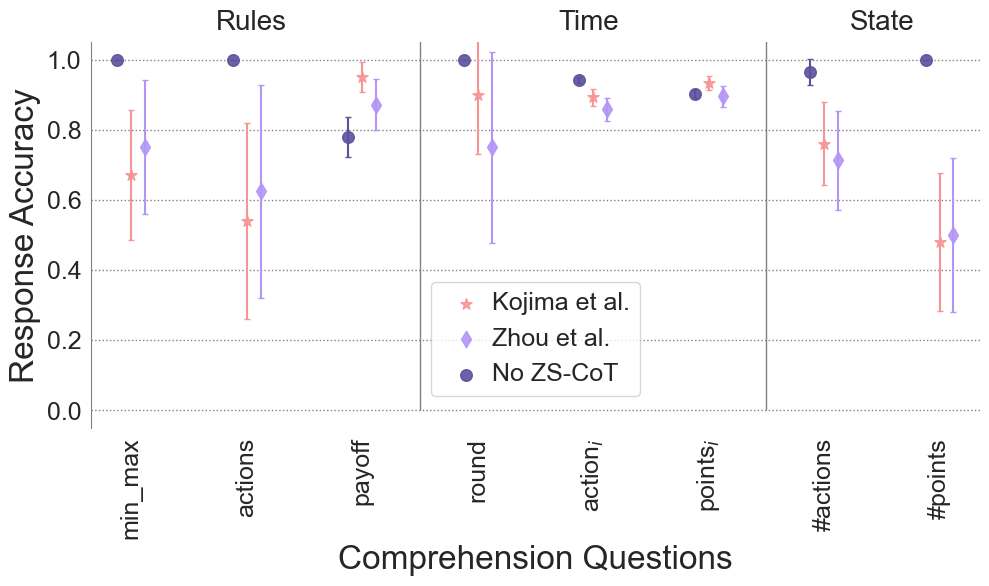

In [21]:
# Plot comprehension questions
from matplotlib import pyplot as plt
from matplotlib import transforms

csv_name = 'comprehension_questions_results.csv'


unordered_kojima_df = pd.read_csv(zscot_dir / "kojima" / csv_name)
unordered_kojima_df['type'] = pd.Categorical(unordered_kojima_df['type'], categories=custom_order, ordered=True)
kojima_df = unordered_kojima_df.sort_values('type').reset_index(drop=True)

unordered_zhou_df = pd.read_csv(zscot_dir / "zhou" / csv_name)
unordered_zhou_df['type'] = pd.Categorical(unordered_zhou_df['type'], categories=custom_order, ordered=True)
zhou_df = unordered_zhou_df.sort_values('type').reset_index(drop=True)

unordered_nozscot_df = pd.read_csv(base_dir / quests_dirname.format(model_name=llama2_str) / csv_name)
unordered_nozscot_df['type'] = pd.Categorical(unordered_nozscot_df['type'], categories=custom_order, ordered=True)
nozscot_df = unordered_nozscot_df.sort_values('type').reset_index(drop=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax.scatter(kojima_df['label'], kojima_df['accuracy'], marker='*',
           s=70, zorder=10, alpha=0.9, c=c_pink1, label="Kojima et al.")#, transform=trans+offset(offset_by_model[llama3_str]))
ax.errorbar(kojima_df['label'], kojima_df['accuracy'],
            yerr=kojima_df['ci_ub'] - kojima_df['ci_lb'],
            capsize=2, fmt='none', c=c_pink1, transform=trans+offset(offset_by_model[llama3_str]))

ax.scatter(zhou_df['label'], zhou_df['accuracy'], marker='d',
           s=70, zorder=10, alpha=0.9, c=c_violet2, label="Zhou et al.", transform=trans+offset(offset_by_model[gpt_str]))
ax.errorbar(zhou_df['label'], zhou_df['accuracy'],
            yerr=zhou_df['ci_ub'] - zhou_df['ci_lb'],
            capsize=2, fmt='none', c=c_violet2, transform=trans+offset(offset_by_model[gpt_str]))

ax.scatter(nozscot_df['label'], nozscot_df['accuracy'], marker=marker_by_model[llama2_str],
           s=70, zorder=10, alpha=0.9, c=color_by_model[llama2_str], label="No ZS-CoT", transform=trans+offset(offset_by_model[llama2_str]))
ax.errorbar(nozscot_df['label'], nozscot_df['accuracy'],
            yerr=nozscot_df['ci_ub'] - nozscot_df['ci_lb'],
            capsize=2, fmt='none', c=color_by_model[llama2_str], transform=trans+offset(offset_by_model[llama2_str]))

# ax.set_xlabel('Comprehension questions', fontsize=24)
# ax.set_ylabel(f'{model_name} response accuracy', fontsize=24)

x_labels = comprehension_questions_labels
ax.set_ylim(-0.05, 1.05)
ax.tick_params(axis='both', labelsize=18)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, fontsize=18)

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_facecolor('white')

ax.vlines(2.5, 0, 1.1, color='gray', linewidth=1)
ax.vlines(5.5, 0, 1.1, color='gray', linewidth=1)

ax.grid(axis='y', color='gray', linestyle=':', linewidth=1)
ax.text(0.18, 1.05, 'Rules', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.56, 1.05, 'Time', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.89, 1.05, 'State', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

lgnd = plt.legend(fontsize=18, loc="lower center", handletextpad=0.05,
                  ncol=1, bbox_to_anchor=(0.5, 0.05))
# lgnd = plt.legend(fontsize=15, loc="lower left", handletextpad=0.05,
#                   ncol=1)  # bbox_to_anchor=(0.1, 0.1), frameon=False
lgnd.get_frame().set_facecolor('white')
# lgnd.get_frame().set_linewidth(0.0)

plt.ylabel('Response Accuracy', fontsize=24)
plt.xlabel('Comprehension Questions', fontsize=24)
plt.tight_layout()
out_fig_name = f'zscot_comparison'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

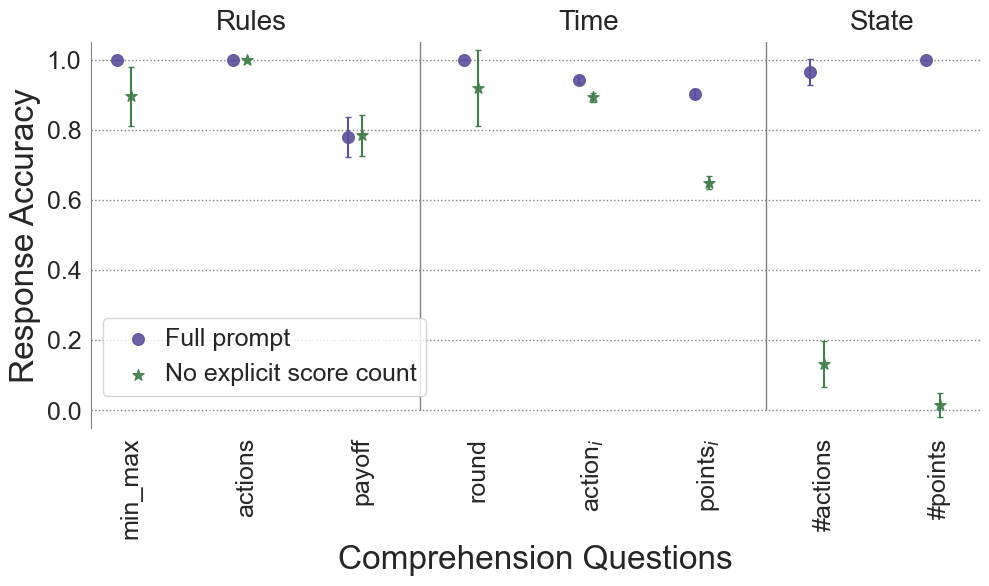

In [22]:
# Plot comprehension questions
from matplotlib import pyplot as plt
from matplotlib import transforms

csv_name = 'comprehension_questions_results.csv'

unordered_initial_df = pd.read_csv(initial_quests_dir / csv_name)
unordered_initial_df['type'] = pd.Categorical(unordered_initial_df['type'], categories=custom_order, ordered=True)
initial_df = unordered_initial_df.sort_values('type').reset_index(drop=True)
unordered_final_df = pd.read_csv(base_dir / quests_dirname.format(model_name=llama2_str) / csv_name)
unordered_final_df['type'] = pd.Categorical(unordered_final_df['type'], categories=custom_order, ordered=True)
final_df = unordered_final_df.sort_values('type').reset_index(drop=True)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax.scatter(final_df['label'], final_df['accuracy'], marker=marker_by_model[llama2_str],
           s=70, zorder=10, alpha=0.9, c=color_by_model[llama2_str], label="Full prompt", transform=trans+offset(offset_by_model[llama2_str]))
ax.errorbar(final_df['label'], final_df['accuracy'],
            yerr=final_df['ci_ub'] - final_df['ci_lb'],
            capsize=2, fmt='none', c=color_by_model[llama2_str], transform=trans+offset(offset_by_model[llama2_str]))

ax.scatter(initial_df['label'], initial_df['accuracy'], marker='*',
           s=70, zorder=10, alpha=0.9, c=c_green5, label="No explicit score count")#, transform=trans+offset(offset_by_model[llama3_str]))
ax.errorbar(initial_df['label'], initial_df['accuracy'],
            yerr=initial_df['ci_ub'] - initial_df['ci_lb'],
            capsize=2, fmt='none', c=c_green5, transform=trans+offset(offset_by_model[llama3_str]))

# ax.set_xlabel('Comprehension questions', fontsize=24)
# ax.set_ylabel(f'{model_name} response accuracy', fontsize=24)

x_labels = comprehension_questions_labels
ax.set_ylim(-0.05, 1.05)
ax.tick_params(axis='both', labelsize=18)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, fontsize=18)

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_facecolor('white')

ax.vlines(2.5, 0, 1.1, color='gray', linewidth=1)
ax.vlines(5.5, 0, 1.1, color='gray', linewidth=1)

ax.grid(axis='y', color='gray', linestyle=':', linewidth=1)
ax.text(0.18, 1.05, 'Rules', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.56, 1.05, 'Time', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.89, 1.05, 'State', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

lgnd = plt.legend(fontsize=18, loc="lower left", handletextpad=0.05,
                  ncol=1, bbox_to_anchor=(0.0, 0.05))
# lgnd = plt.legend(fontsize=15, loc="lower left", handletextpad=0.05,
#                   ncol=1)  # bbox_to_anchor=(0.1, 0.1), frameon=False
lgnd.get_frame().set_facecolor('white')
# lgnd.get_frame().set_linewidth(0.0)

plt.ylabel('Response Accuracy', fontsize=24)
plt.xlabel('Comprehension Questions', fontsize=24)
plt.tight_layout()
out_fig_name = f'initial_final_comparison'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

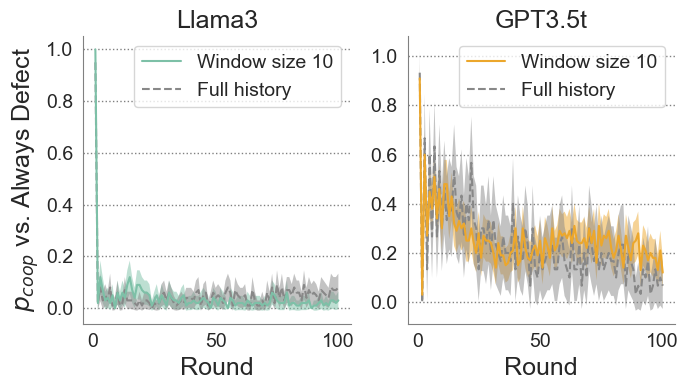

In [56]:
fig, axs = plt.subplots(1,2,figsize=(7,4))
# fig, ax = plt.subplots(1,1,figsize=(5,4))
alpha=1.0
    

llama3_100_df = pd.read_csv(base_dir / ws100_dirname.format(model_name=llama3_str) / "average_cooperation_per_round.csv")
llama3_10_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama3_str) / 'URND00' / "average_cooperation_per_round.csv")

gpt_100_df = pd.read_csv(base_dir / ws100_dirname.format(model_name=gpt_str) / "average_cooperation_per_round.csv")
gpt_10_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=gpt_str) / 'URND00' / "average_cooperation_per_round.csv")

ax = axs[0]

ax.plot(llama3_10_df['iteration'], llama3_10_df[f'mean'], '-', markersize=5,
            c=color_by_model[llama3_str], zorder=2, alpha=alpha, label="Window size 10")
ax.fill_between(llama3_10_df['iteration'], llama3_10_df[f'ci_lb'], llama3_10_df[f'ci_ub'], 
                color=color_by_model[llama3_str], edgecolor="none", alpha=0.5, zorder=1)

ax.plot(llama3_100_df['iteration'], llama3_100_df[f'mean'], '--', markersize=5,
            c=c_gray2, zorder=1, alpha=alpha, label="Full history")
ax.fill_between(llama3_100_df['iteration'], llama3_100_df[f'ci_lb'], llama3_100_df[f'ci_ub'], 
                color=c_gray2, edgecolor="none", alpha=0.5, zorder=1)

lgnd = ax.legend(fontsize=14, loc="upper right")
lgnd.get_frame().set_facecolor('white')

ax.set_title(label_by_model[llama3_str], fontsize=18)
ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
#ax.set_xticks(df_win['iteration'])
ax.set_ylabel('$p_{coop}$ vs. Always Defect', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Round', fontsize=18)

# ax.text(0.7, 1, 'Full history', fontsize=14,
#         horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
# ax.text(0.7, 0.2, 'Window size 10', fontsize=14,
#         horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

ax = axs[1]

ax.plot(gpt_10_df['iteration'], gpt_10_df[f'mean'], '-', markersize=5,
            c=color_by_model[gpt_str], zorder=2, alpha=alpha, label="Window size 10")
ax.fill_between(gpt_10_df['iteration'], gpt_10_df[f'ci_lb'], gpt_10_df[f'ci_ub'], 
                color=color_by_model[gpt_str], edgecolor="none", alpha=0.5, zorder=1)

ax.plot(gpt_100_df['iteration'], gpt_100_df[f'mean'], '--', markersize=5,
            c=c_gray2, zorder=1, alpha=alpha, label="Full history")
ax.fill_between(gpt_100_df['iteration'], gpt_100_df[f'ci_lb'], gpt_100_df[f'ci_ub'], 
                color=c_gray2, edgecolor="none", alpha=0.5, zorder=1)

lgnd = ax.legend(fontsize=14, loc="upper right")
lgnd.get_frame().set_facecolor('white')

ax.set_title(label_by_model[gpt_str], fontsize=18)
ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
#ax.set_xticks(df_win['iteration'])
# ax.set_ylabel('$p_{coop}$ vs. Always Defect', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Round', fontsize=18)

plt.tight_layout()
out_fig_name = f'{llama3_str}_{gpt_str}_window_sizes_comparison'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

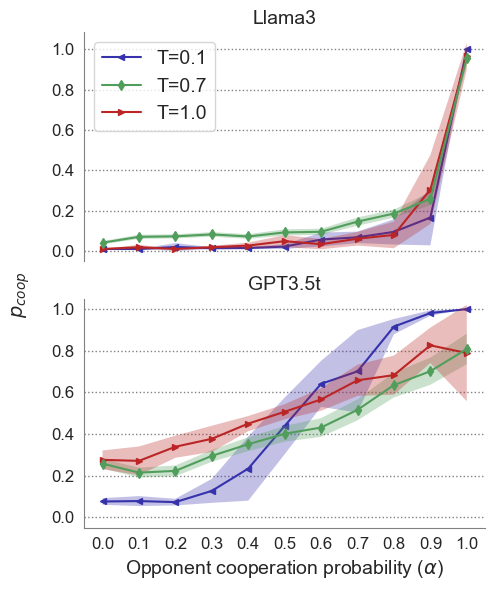

In [2]:
fig, axs = plt.subplots(2,1,figsize=(5,6))
# fig, ax = plt.subplots(1,1,figsize=(5,4))
fig.supylabel('$p_{coop}$', fontsize=14)
alpha=1.0
alpha_fill = 0.3

file_name = "coop_probability_vs_urnd_alpha.csv"

# model_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=model_name) / csv_name)
# 
# t01_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=model_name) / "rerun_10_games" / "T01" / csv_name)
# t10_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=model_name) / "rerun_10_games" / "T10" / csv_name)

llama3_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama3_str) / file_name)
gpt_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=gpt_str) / file_name)

llama3_t01_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=llama3_str) / "rerun_10_games" / "T01" / file_name)
llama3_t10_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=llama3_str) / "rerun_10_games" / "T10" / file_name)
gpt_t01_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=gpt_str) / "rerun_10_games" / "T01" / file_name)
gpt_t10_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=gpt_str) / "rerun_10_games" / "T10" / file_name)

ax = axs[0]

ax.plot(llama3_t01_df['URND_alpha'], llama3_t01_df[f'model_coop'], marker='<', markersize=5,
            c=c_blue5, zorder=1, alpha=alpha, label="T=0.1")
ax.fill_between(llama3_t01_df['URND_alpha'], llama3_t01_df[f'ci_lb'], llama3_t01_df[f'ci_ub'],
                color=c_blue5, edgecolor="none", alpha=alpha_fill, zorder=1)

ax.plot(llama3_df['URND_alpha'], llama3_df[f'model_coop'], marker='d', markersize=5,
            c=c_green3, zorder=2, alpha=alpha, label="T=0.7")
ax.fill_between(llama3_df['URND_alpha'], llama3_df[f'ci_lb'], llama3_df[f'ci_ub'],
                color=c_green3, edgecolor="none", alpha=alpha_fill, zorder=1)

ax.plot(llama3_t10_df['URND_alpha'], llama3_t10_df[f'model_coop'], marker='>', markersize=5,
            c=c_red4, zorder=1, alpha=alpha, label="T=1.0")
ax.fill_between(llama3_t10_df['URND_alpha'], llama3_t10_df[f'ci_lb'], llama3_t10_df[f'ci_ub'],
                color=c_red4, edgecolor="none", alpha=alpha_fill, zorder=1)

lgnd = ax.legend(fontsize=14, loc="upper left")
lgnd.get_frame().set_facecolor('white')

ax.set_title(label_by_model[llama3_str], fontsize=14)
ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_xticklabels([])

ax = axs[1]

ax.plot(gpt_t01_df['URND_alpha'], gpt_t01_df[f'model_coop'], marker='<', markersize=5,
            c=c_blue5, zorder=1, alpha=alpha, label="T=0.1")
ax.fill_between(gpt_t01_df['URND_alpha'], gpt_t01_df[f'ci_lb'], gpt_t01_df[f'ci_ub'],
                color=c_blue5, edgecolor="none", alpha=alpha_fill, zorder=1)

ax.plot(gpt_df['URND_alpha'], gpt_df[f'model_coop'], marker='d', markersize=5,
            c=c_green3, zorder=2, alpha=alpha, label="T=0.7")
ax.fill_between(gpt_df['URND_alpha'], gpt_df[f'ci_lb'], gpt_df[f'ci_ub'],
                color=c_green3, edgecolor="none", alpha=alpha_fill, zorder=1)

ax.plot(gpt_t10_df['URND_alpha'], gpt_t10_df[f'model_coop'], marker='>', markersize=5,
            c=c_red4, zorder=1, alpha=alpha, label="T=1.0")
ax.fill_between(gpt_t10_df['URND_alpha'], gpt_t10_df[f'ci_lb'], gpt_t10_df[f'ci_ub'],
                color=c_red4, edgecolor="none", alpha=alpha_fill, zorder=1)

ax.set_title(label_by_model[gpt_str], fontsize=14)
ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([-0.05, 1.05])
ax.tick_params(axis='both', labelsize=12)
ax.set_xticks([x / 10 for x in range(11)])
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)

plt.tight_layout()
out_fig_name = f'temperature_comparison'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))

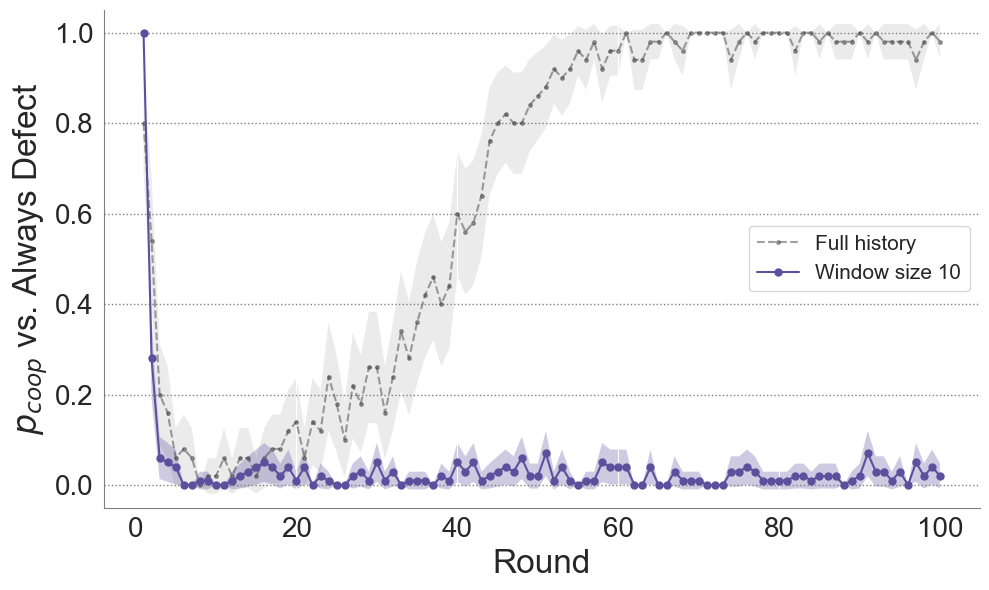

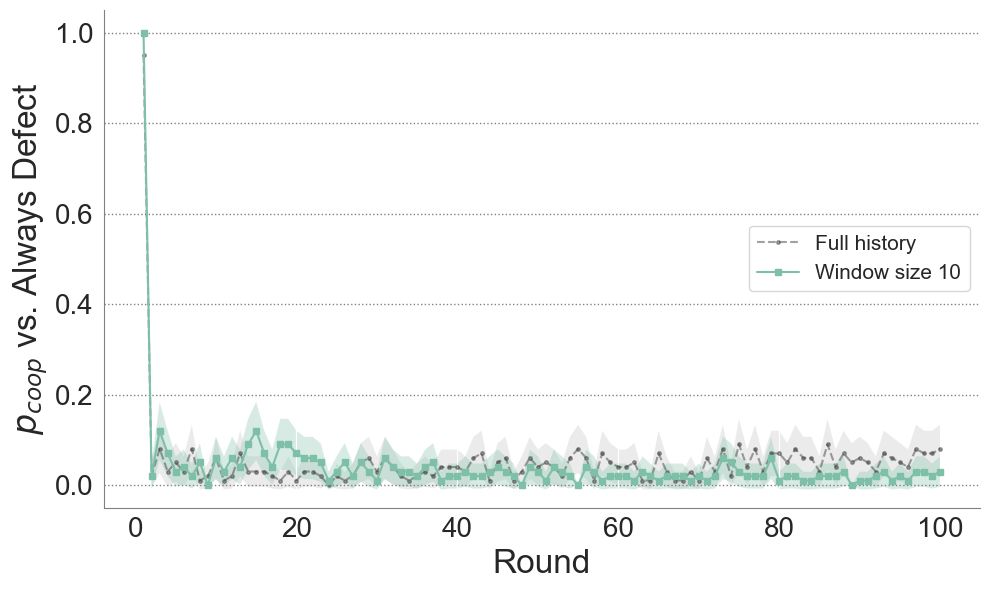

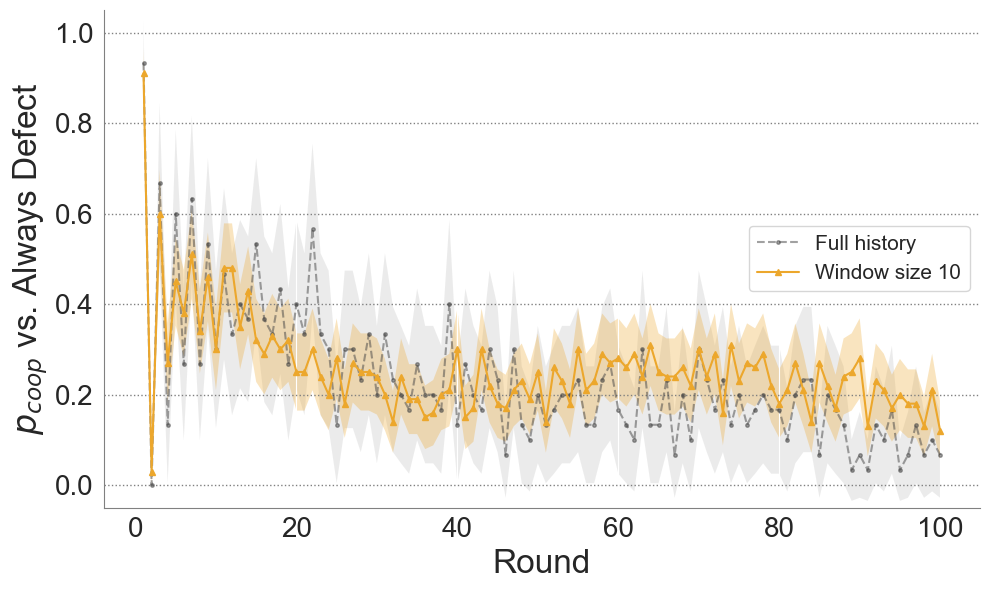

In [30]:
# Plot window size impact
first_window_size = 100
second_window_size = 10

for model_name in [llama2_str, llama3_str, gpt_str]:
    first_dir = base_dir / ws100_dirname.format(model_name=model_name)
    second_dir = base_dir / urndx_dirname.format(model_name=model_name) / 'URND00'

    df_win1 = pd.read_csv(first_dir / "average_cooperation_per_round.csv")
    df_win2 = pd.read_csv(second_dir / "average_cooperation_per_round.csv")

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    ax.plot(df_win1['iteration'], df_win1['mean'], marker='.', linestyle='--', markersize=5, zorder=2, alpha=0.5, c=c_gray1, label=f"Full history")
    ax.fill_between(df_win1['iteration'], df_win1['ci_lb'], df_win1['ci_ub'], color=c_gray1, alpha=0.1, edgecolor="none", zorder=0)

    ax.plot(df_win2['iteration'], df_win2['mean'], marker=marker_by_model[model_name], markersize=5, zorder=2, alpha=1.0, c=color_by_model[model_name],
            label=f"Window size {second_window_size}")
    ax.fill_between(df_win2['iteration'], df_win2['ci_lb'], df_win2['ci_ub'], color=color_by_model[model_name], alpha=0.3, edgecolor="none", zorder=0)

    ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_facecolor('white')
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=1)

    # ax.set_ylabel(f'{model_name} $p_{{coop}}$ vs. Always Defect', fontsize=24)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlabel('Round', fontsize=24)

    ax.set_ylim(-0.05, 1.05)

    lgnd = plt.legend(loc='center right', fontsize=15)

    # lgnd = plt.legend(fontsize=15, loc="lower left", handletextpad=0.05,
    #                   ncol=1)  # bbox_to_anchor=(0.1, 0.1), frameon=False
    lgnd.get_frame().set_facecolor('white')
    # lgnd.get_frame().set_linewidth(0.0)

    plt.ylabel('$p_{coop}$ vs. Always Defect', fontsize=24)
    plt.tight_layout()
    # out_fig_name = f'{model_name}_{first_window_size}w_vs_{second_window_size}w' if out_fig_name is None else out_fig_name
    out_fig_name = f'{model_name}_ad_ws100_ws10'
    file_path = rebuttal_dir / out_fig_name
    plt.savefig(file_path.with_suffix('.pdf'))
    plt.savefig(file_path.with_suffix('.png'))

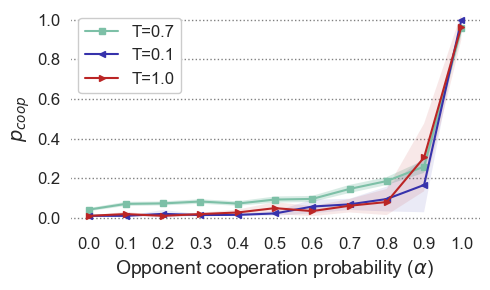

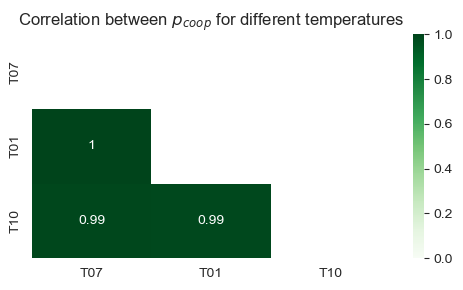

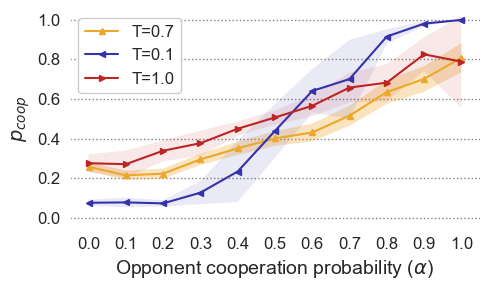

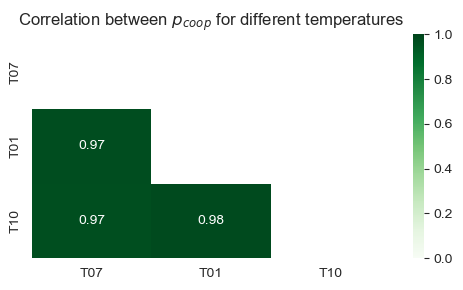

In [37]:
import numpy as np
import seaborn as sns

csv_name = 'coop_probability_vs_urnd_alpha.csv'

for model_name in [llama3_str, gpt_str]:
    model_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=model_name) / csv_name)

    t01_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=model_name) / "rerun_10_games" / "T01" / csv_name)
    t10_df = pd.read_csv(base_dir / temperature_dirname.format(model_name=model_name) / "rerun_10_games" / "T10" / csv_name)

    fig, ax = plt.subplots(1, 1, figsize=(5, 3))

    ax.plot(model_df['URND_alpha'], model_df['model_coop'], marker=marker_by_model[model_name], markersize=5, zorder=2, alpha=1.0, c=color_by_model[model_name],
            label="T=0.7")
    ax.fill_between(model_df['URND_alpha'], model_df['ci_lb'], model_df['ci_ub'], color=color_by_model[model_name], alpha=0.3, edgecolor="none", zorder=1)

    ax.plot(t01_df['URND_alpha'], t01_df['model_coop'], marker='<', markersize=5, zorder=2, alpha=1.0, c=c_blue5,
            label="T=0.1")
    ax.fill_between(t01_df['URND_alpha'], t01_df['ci_lb'], t01_df['ci_ub'], color=c_blue5, alpha=0.1, edgecolor="none", zorder=1)

    ax.plot(t10_df['URND_alpha'], t10_df['model_coop'], marker='>', markersize=5, zorder=2, alpha=1.0, c=c_red4,
            label="T=1.0")
    ax.fill_between(t10_df['URND_alpha'], t10_df['ci_lb'], t10_df['ci_ub'], color=c_red4, alpha=0.1, edgecolor="none", zorder=1)

    ax.set_facecolor('white')

    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
    ax.set_facecolor('white')
    ax.set_xticks([x / 10 for x in range(11)])
    # ax.set_ylabel(f'{model_name} $p_{{coop}}$', fontsize=14)
    ax.set_ylabel(f'$p_{{coop}}$', fontsize=14)
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlim([-0.05, 1.05])
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
    lgnd = plt.legend(loc='upper left', fontsize=12, framealpha=1)
    lgnd.get_frame().set_facecolor('white')
    plt.tight_layout()

    out_fig_name = f'{model_name}_temperature_coop_per_alpha'
    file_path = rebuttal_dir / out_fig_name
    plt.savefig(file_path.with_suffix('.pdf'))
    plt.savefig(file_path.with_suffix('.png'))

    correlation_df = pd.DataFrame()
    correlation_df['T07'] = model_df['model_coop']
    correlation_df['T01'] = t01_df['model_coop']
    correlation_df['T10'] = t10_df['model_coop']

    matrix = correlation_df.corr()
    mask = np.triu(matrix)

    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    sns.heatmap(matrix, cmap="Greens", annot=True, mask=mask, vmin=0, vmax=1)
    plt.title("Correlation between $p_{coop}$ for different temperatures", fontsize=12)
    ax.set_facecolor('white')

    plt.tight_layout()
    out_fig_name = f'{model_name}_temperature_coop_correlation'
    file_path = rebuttal_dir / out_fig_name
    plt.savefig(file_path.with_suffix('.pdf'))
    plt.savefig(file_path.with_suffix('.png'))



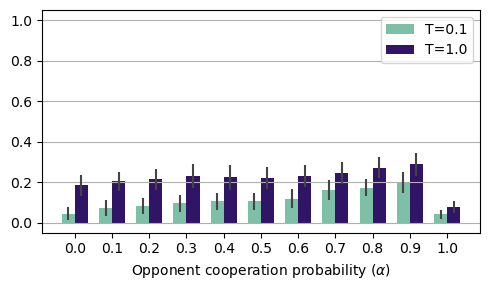

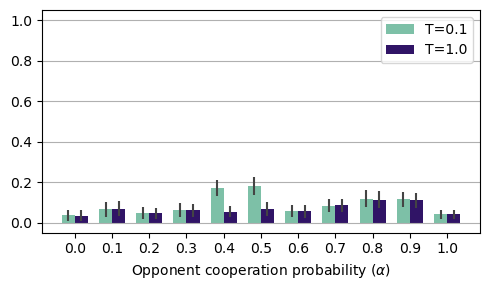

In [8]:
for model_name in {llama3_str, gpt_str}:
    df_temperature = pd.read_csv(base_dir / temperature_dirname.format(model_name=model_name) / "avg_game_diff_vs_urnd_alpha.csv")

    bar_width = 0.35
    r1 = [x for x in range(11)]
    r2 = [x + bar_width for x in r1]

    mean_str = "mean_{alpha}"
    ci_lb_str = "ci_lb_{alpha}"
    ci_ub_str = "ci_ub_{alpha}"

    fig, ax = plt.subplots(1, 1, figsize=(5, 3))

    plt.bar(r1, [df_temperature[mean_str.format(alpha=alpha / 10)][0] for alpha in range(11)], color=c_green1, label="T=0.1", width=bar_width)
    ax.errorbar(r1, [df_temperature[mean_str.format(alpha=alpha / 10)][0] for alpha in range(11)],
                yerr=[df_temperature[ci_ub_str.format(alpha=alpha / 10)][0] - df_temperature[ci_lb_str.format(alpha=alpha / 10)][0] for alpha in range(11)], fmt='none', c=c_gray1)

    plt.bar(r2, [df_temperature[mean_str.format(alpha=alpha / 10)][1] for alpha in range(11)], color=c_violet1, label="T=1.0", width=bar_width)
    ax.errorbar(r2, [df_temperature[mean_str.format(alpha=alpha / 10)][1] for alpha in range(11)],
                yerr=[df_temperature[ci_ub_str.format(alpha=alpha / 10)][1] - df_temperature[ci_lb_str.format(alpha=alpha / 10)][1] for alpha in range(11)], fmt='none', c=c_gray1)

    plt.xticks([r + bar_width / 2 for r in r1], [x / 10 for x in range(11)])
    # plt.title(f"Llama3 - Game difference in 10 sampled rounds over 100 games")
    plt.xlabel("Opponent cooperation probability ($α$)")
    # plt.ylabel("Average game difference")
    plt.ylim(-0.05, 1.05)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    out_fig_name = f'{model_name}_temperature_diff_per_alpha'
    file_path = rebuttal_dir / out_fig_name
    plt.savefig(file_path.with_suffix('.pdf'))
    plt.savefig(file_path.with_suffix('.png'))

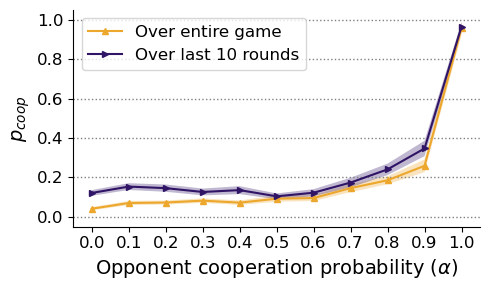

In [7]:
csv_name = 'aggregates_computation_variation_per_alpha.csv'

comparison_df = pd.read_csv(base_dir / "fixed_prompt" / csv_name)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.plot(comparison_df['URND_alpha'], comparison_df['model_coop'], marker=marker_by_model[llama3_str], markersize=5, zorder=2, alpha=1.0, c=color_by_model[llama3_str],
        label="Over entire game")
ax.fill_between(comparison_df['URND_alpha'], comparison_df['ci_lb'], comparison_df['ci_ub'], color=color_by_model[llama3_str], alpha=0.3, edgecolor="none", zorder=0)

ax.plot(comparison_df['URND_alpha'], comparison_df['fixed_coop'], marker=">", markersize=5, zorder=2, alpha=1.0, c=c_violet1,
        label="Over last 10 rounds")
ax.fill_between(comparison_df['URND_alpha'], comparison_df['fixed_ci_lb'], comparison_df['fixed_ci_ub'], color=c_violet1, alpha=0.3, edgecolor="none", zorder=0)

ax.set_facecolor('white')

ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_xticks([x / 10 for x in range(11)])
# ax.set_ylabel(f'{model_name} $p_{{coop}}$', fontsize=14)
ax.set_ylabel(f'$p_{{coop}}$', fontsize=14)
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([-0.05, 1.05])
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

out_fig_name = f'aggregates_computation_variation_per_alpha'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))